In [1]:
import numpy as np
import cv2
import os
import itertools
import math
from os import listdir
from os.path import isfile, join

In [2]:
# Compiles all images in a folder to a video
base_dir = './images/'
capture_dir = 'test/'
path = base_dir + capture_dir

frame_files = [f for f in listdir(path) if isfile(join(path, f))]
frame_files.sort()

front_deadzone = 5000
frame_files = frame_files[front_deadzone::]

frame_skip = 100
frame_files = frame_files[::frame_skip]


In [3]:
diff_scale = 1.0/2.0


diffs = []
# Iterate through frames and find diffs
for idx,frame_f in enumerate(frame_files):
    frame = cv2.imread(base_dir+capture_dir+frame_f).astype(np.float32)/255.0
    new_size = tuple((np.array(frame.shape[0:2])/diff_scale).astype(np.int))
    frame_rs = cv2.resize(frame, new_size)
    if(idx != 0):
        diff = np.sum(np.abs(frame_rs - frame_rs_last))/frame_rs.size
        print('{0}\t{1:3.2f}\t{2:f}'.format(idx, float(idx)/len(frame_files), diff))
        diffs.append(diff)
    frame_rs_last = frame_rs

/tmp/ipykernel_81022/2506017504.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_size = tuple((np.array(frame.shape[0:2])/diff_scale).astype(np.int))


1	0.00	0.002692
2	0.01	0.002446
3	0.01	0.002316
4	0.01	0.003156
5	0.01	0.002324
6	0.02	0.003102
7	0.02	0.003118
8	0.02	0.002730
9	0.03	0.002505
10	0.03	0.002690
11	0.03	0.002337
12	0.03	0.002155
13	0.04	0.002336
14	0.04	0.002352
15	0.04	0.002160
16	0.05	0.002417
17	0.05	0.002155
18	0.05	0.002200
19	0.05	0.002204
20	0.06	0.002414
21	0.06	0.002203
22	0.06	0.002634
23	0.07	0.002700
24	0.07	0.002130
25	0.07	0.002122
26	0.07	0.003049
27	0.08	0.001893
28	0.08	0.002098
29	0.08	0.002663
30	0.09	0.002701
31	0.09	0.002154
32	0.09	0.002253
33	0.09	0.002869
34	0.10	0.002714
35	0.10	0.002085
36	0.10	0.002714
37	0.11	0.002091
38	0.11	0.004516
39	0.11	0.002111
40	0.11	0.002421
41	0.12	0.002141
42	0.12	0.002148
43	0.12	0.002062
44	0.12	0.002052
45	0.13	0.002887
46	0.13	0.002397
47	0.13	0.002029
48	0.14	0.002126
49	0.14	0.002597
50	0.14	0.002373
51	0.14	0.002149
52	0.15	0.002252
53	0.15	0.002545
54	0.15	0.002093
55	0.16	0.002202
56	0.16	0.002129
57	0.16	0.001826
58	0.16	0.002121
59	0.17	0.002342
60	0.1

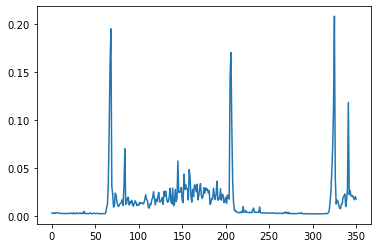

In [4]:
import matplotlib.pyplot as plt


plt.plot(np.array(diffs))
plt.show()

In [ ]:
diff_scale = 1.0/2.0

# Copy this so we can chop away at all_frames
all_frames = frame_files.copy()

# Minimum difference b/t conseq frame means
min_diff = 0.008
diff = 0

frame_mean_last = cv2.imread(base_dir+capture_dir+all_frames.pop(0)).astype(np.float32)/255.0
new_size = tuple((np.array(frame_mean_last.shape[0:2])/diff_scale).astype(np.int))
frame_mean_rs_last = cv2.resize(frame_mean_last, new_size)
out_frame_count = 0
while(len(all_frames) > 0):
    out_frame_count += 1
    frame_sum_cur = cv2.imread(base_dir+capture_dir+all_frames.pop(0)).astype(np.float32)/255.0
    frame_count_cur = 1
    diff = 0
    while(diff < min_diff and len(all_frames) > 0):
        # Add a frame to the current summer
        frame_sum_cur += cv2.imread(base_dir+capture_dir+all_frames.pop(0)).astype(np.float32)/255.0
        frame_count_cur += 1
        # Calculate the mean frame from this sum
        frame_mean_cur = frame_sum_cur/frame_count_cur
        # Downscale it to reduce noise
        frame_mean_rs_cur = cv2.resize(frame_mean_cur, new_size)
        # Calculate the difference again
        diff = np.sum(np.abs(frame_mean_rs_cur - frame_mean_rs_last))/frame_mean_rs_cur.size
    # Write out the frame now that we have a suitable diff
    print('Writing out frame ', out_frame_count, ' of depth ', frame_count_cur, ' with diff ', diff) 
    # Set current to last
    frame_mean_last = frame_mean_cur
    cv2.imshow('frame', frame_mean_rs_cur)
    cv2.waitkey(0)
    

        


/tmp/ipykernel_81022/3964009348.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  new_size = tuple((np.array(frame_mean_last.shape[0:2])/diff_scale).astype(np.int))
